Lefki Ioanna (Eleanna) Panagiotou 

ID: 908 589 7206

In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        noise = torch.randn_like(x)
        x = x + noise
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

### Question 1c - GAN + Noise to the input of the discriminator

  0%|          | 0/117 [00:00<?, ?it/s]

118it [00:19,  5.94it/s]                         


Epoch 1 of 100
Generator loss: 2.61467147, Discriminator loss: 0.86558563


118it [00:13,  9.05it/s]                         


Epoch 2 of 100
Generator loss: 2.26296663, Discriminator loss: 1.19030690


118it [00:12,  9.49it/s]                         


Epoch 3 of 100
Generator loss: 5.55446720, Discriminator loss: 0.46524993


118it [00:12,  9.26it/s]                         


Epoch 4 of 100
Generator loss: 3.29541206, Discriminator loss: 0.78871369


118it [00:12,  9.38it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


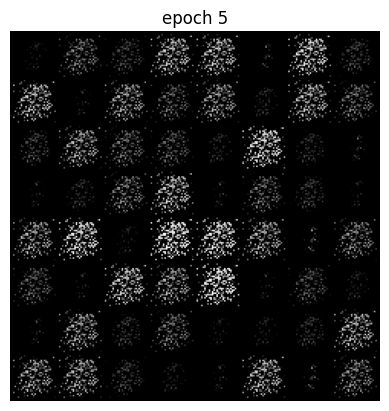

Epoch 5 of 100
Generator loss: 3.89195967, Discriminator loss: 0.50883996


118it [00:14,  8.28it/s]                         


Epoch 6 of 100
Generator loss: 1.33171439, Discriminator loss: 1.21349919


118it [00:12,  9.30it/s]                         


Epoch 7 of 100
Generator loss: 1.01474535, Discriminator loss: 1.25415468


118it [00:12,  9.40it/s]                         


Epoch 8 of 100
Generator loss: 1.09387457, Discriminator loss: 1.22261763


118it [00:13,  8.98it/s]                         


Epoch 9 of 100
Generator loss: 0.86424094, Discriminator loss: 1.21788335


118it [00:13,  8.94it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


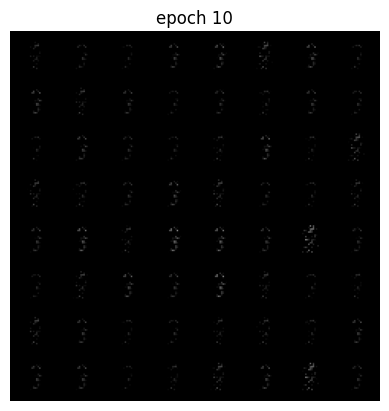

Epoch 10 of 100
Generator loss: 0.80175251, Discriminator loss: 1.30451679


118it [00:12,  9.20it/s]                         


Epoch 11 of 100
Generator loss: 0.74951994, Discriminator loss: 1.33556247


118it [00:13,  8.99it/s]                         


Epoch 12 of 100
Generator loss: 0.79042029, Discriminator loss: 1.26875508


118it [00:12,  9.49it/s]                         


Epoch 13 of 100
Generator loss: 0.97841930, Discriminator loss: 1.11580253


118it [00:12,  9.31it/s]                         


Epoch 14 of 100
Generator loss: 1.23372614, Discriminator loss: 0.99068397


118it [00:13,  8.97it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


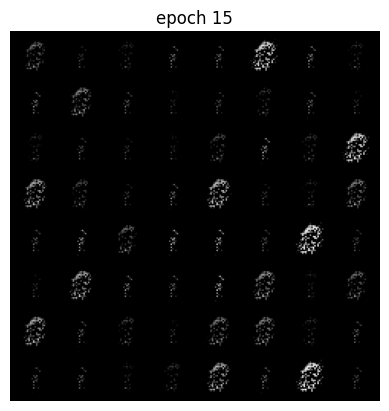

Epoch 15 of 100
Generator loss: 1.54513156, Discriminator loss: 0.83824533


118it [00:13,  9.07it/s]                         


Epoch 16 of 100
Generator loss: 2.10889482, Discriminator loss: 0.58730096


118it [00:13,  8.60it/s]                         


Epoch 17 of 100
Generator loss: 2.13424253, Discriminator loss: 0.63393766


118it [00:13,  8.66it/s]                         


Epoch 18 of 100
Generator loss: 2.36937714, Discriminator loss: 0.49727806


118it [00:12,  9.19it/s]                         


Epoch 19 of 100
Generator loss: 2.42830443, Discriminator loss: 0.49741179


118it [00:12,  9.26it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


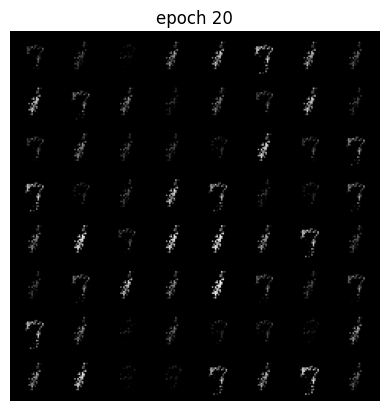

Epoch 20 of 100
Generator loss: 2.82792354, Discriminator loss: 0.40410838


118it [00:12,  9.32it/s]                         


Epoch 21 of 100
Generator loss: 2.83612132, Discriminator loss: 0.48762715


118it [00:13,  8.65it/s]                         


Epoch 22 of 100
Generator loss: 2.60986090, Discriminator loss: 0.53856105


118it [00:12,  9.29it/s]                         


Epoch 23 of 100
Generator loss: 2.54614520, Discriminator loss: 0.54223406


118it [00:12,  9.36it/s]                         


Epoch 24 of 100
Generator loss: 2.35490704, Discriminator loss: 0.61537206


118it [00:13,  8.97it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


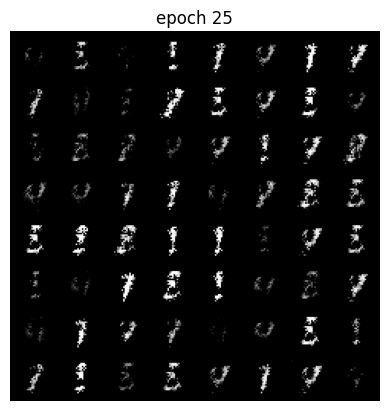

Epoch 25 of 100
Generator loss: 2.08713794, Discriminator loss: 0.64838767


118it [00:13,  8.64it/s]                         


Epoch 26 of 100
Generator loss: 2.26439953, Discriminator loss: 0.63216925


118it [00:13,  8.67it/s]                         


Epoch 27 of 100
Generator loss: 2.09176207, Discriminator loss: 0.66971052


118it [00:12,  9.16it/s]                         


Epoch 28 of 100
Generator loss: 2.14464307, Discriminator loss: 0.66141200


118it [00:13,  8.74it/s]                         


Epoch 29 of 100
Generator loss: 2.23739290, Discriminator loss: 0.62320167


118it [00:12,  9.21it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


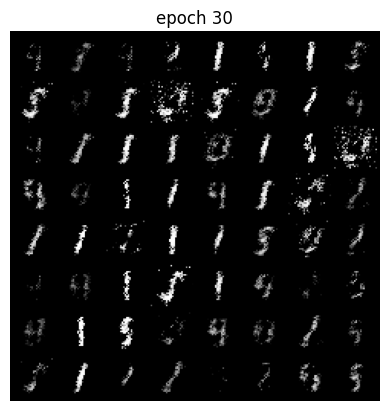

Epoch 30 of 100
Generator loss: 2.23083949, Discriminator loss: 0.66392219


118it [00:13,  9.00it/s]                         


Epoch 31 of 100
Generator loss: 2.12957573, Discriminator loss: 0.64580494


118it [00:13,  8.95it/s]                         


Epoch 32 of 100
Generator loss: 2.28273344, Discriminator loss: 0.60051459


118it [00:12,  9.32it/s]                         


Epoch 33 of 100
Generator loss: 2.17756462, Discriminator loss: 0.64333802


118it [00:13,  8.98it/s]                         


Epoch 34 of 100
Generator loss: 2.08201838, Discriminator loss: 0.68854213


118it [00:12,  9.08it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


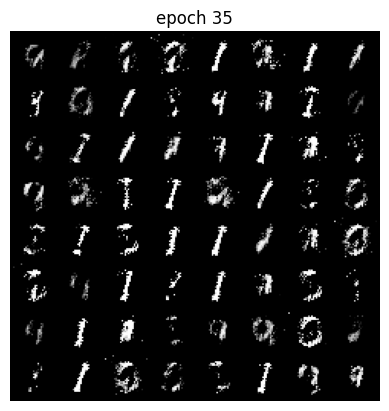

Epoch 35 of 100
Generator loss: 2.28702021, Discriminator loss: 0.62799484


118it [00:13,  8.50it/s]                         


Epoch 36 of 100
Generator loss: 2.12103987, Discriminator loss: 0.69202036


118it [00:13,  9.04it/s]                         


Epoch 37 of 100
Generator loss: 2.17757082, Discriminator loss: 0.67042792


118it [00:13,  8.86it/s]                         


Epoch 38 of 100
Generator loss: 2.21469116, Discriminator loss: 0.65136081


118it [00:13,  8.57it/s]                         


Epoch 39 of 100
Generator loss: 2.29710078, Discriminator loss: 0.63361257


118it [00:12,  9.35it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


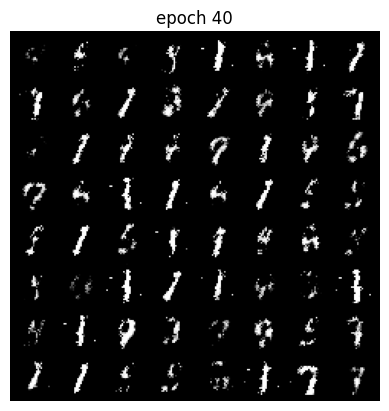

Epoch 40 of 100
Generator loss: 2.22012711, Discriminator loss: 0.66847104


118it [00:12,  9.16it/s]                         


Epoch 41 of 100
Generator loss: 2.17472458, Discriminator loss: 0.67000067


118it [00:12,  9.24it/s]                         


Epoch 42 of 100
Generator loss: 2.22920609, Discriminator loss: 0.65549856


118it [00:12,  9.15it/s]                         


Epoch 43 of 100
Generator loss: 2.15173435, Discriminator loss: 0.66106510


118it [00:12,  9.62it/s]                         


Epoch 44 of 100
Generator loss: 2.08487940, Discriminator loss: 0.70013714


118it [00:12,  9.38it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


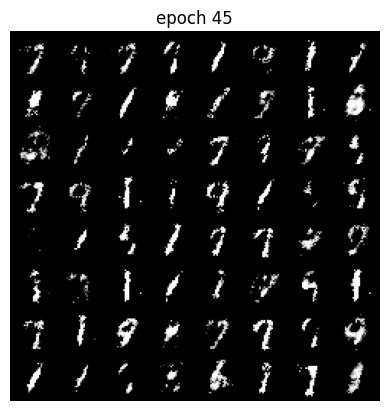

Epoch 45 of 100
Generator loss: 2.07151175, Discriminator loss: 0.70564330


118it [00:12,  9.47it/s]                         


Epoch 46 of 100
Generator loss: 1.98816311, Discriminator loss: 0.73714525


118it [00:11,  9.86it/s]                         


Epoch 47 of 100
Generator loss: 2.04868746, Discriminator loss: 0.70781100


118it [00:12,  9.33it/s]                         


Epoch 48 of 100
Generator loss: 2.03601146, Discriminator loss: 0.71194184


118it [00:12,  9.62it/s]                         


Epoch 49 of 100
Generator loss: 2.15677357, Discriminator loss: 0.66518146


118it [00:12,  9.50it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


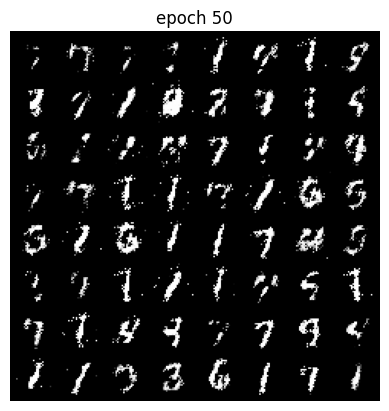

Epoch 50 of 100
Generator loss: 2.10329437, Discriminator loss: 0.70608222


118it [00:13,  9.04it/s]                         


Epoch 51 of 100
Generator loss: 2.07841945, Discriminator loss: 0.70533907


118it [00:12,  9.53it/s]                         


Epoch 52 of 100
Generator loss: 1.98867536, Discriminator loss: 0.71893090


118it [00:12,  9.81it/s]                         


Epoch 53 of 100
Generator loss: 1.92378294, Discriminator loss: 0.73625493


118it [00:12,  9.71it/s]                         


Epoch 54 of 100
Generator loss: 1.94278526, Discriminator loss: 0.73023444


118it [00:12,  9.62it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


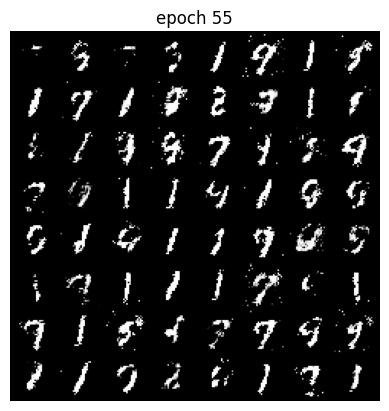

Epoch 55 of 100
Generator loss: 1.94016635, Discriminator loss: 0.73229116


118it [00:12,  9.43it/s]                         


Epoch 56 of 100
Generator loss: 1.94899631, Discriminator loss: 0.74007446


118it [00:12,  9.45it/s]                         


Epoch 57 of 100
Generator loss: 1.89122987, Discriminator loss: 0.76660979


118it [00:14,  8.31it/s]                         


Epoch 58 of 100
Generator loss: 1.91719604, Discriminator loss: 0.75324738


118it [00:12,  9.60it/s]                         


Epoch 59 of 100
Generator loss: 1.87703729, Discriminator loss: 0.77163398


118it [00:13,  8.85it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


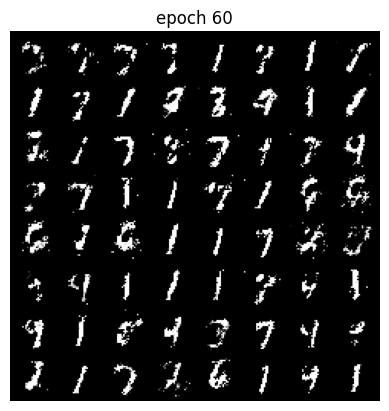

Epoch 60 of 100
Generator loss: 1.89260399, Discriminator loss: 0.74556094


118it [00:13,  9.07it/s]                         


Epoch 61 of 100
Generator loss: 1.89658511, Discriminator loss: 0.76777095


118it [00:13,  8.89it/s]                         


Epoch 62 of 100
Generator loss: 1.82188177, Discriminator loss: 0.78427267


118it [00:13,  8.77it/s]                         


Epoch 63 of 100
Generator loss: 1.86077344, Discriminator loss: 0.78916889


118it [00:13,  8.58it/s]                         


Epoch 64 of 100
Generator loss: 1.73786926, Discriminator loss: 0.83068705


118it [00:12,  9.46it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


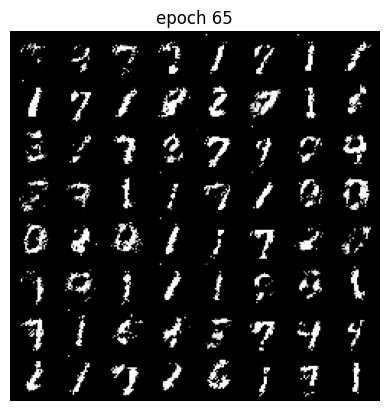

Epoch 65 of 100
Generator loss: 1.71964610, Discriminator loss: 0.84698921


118it [00:13,  8.67it/s]                         


Epoch 66 of 100
Generator loss: 1.64762676, Discriminator loss: 0.87735713


118it [00:14,  8.16it/s]                         


Epoch 67 of 100
Generator loss: 1.71669281, Discriminator loss: 0.83163798


118it [00:13,  8.89it/s]                         


Epoch 68 of 100
Generator loss: 1.74826694, Discriminator loss: 0.83901513


118it [00:12,  9.19it/s]                         


Epoch 69 of 100
Generator loss: 1.63255966, Discriminator loss: 0.88078475


118it [00:12,  9.41it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


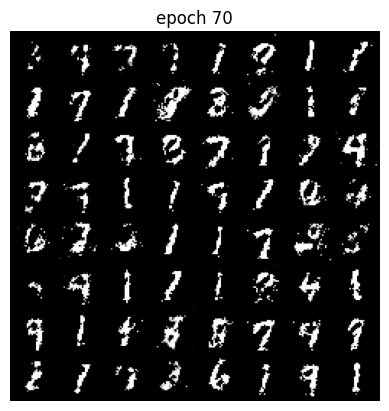

Epoch 70 of 100
Generator loss: 1.66695106, Discriminator loss: 0.86929822


118it [00:12,  9.67it/s]                         


Epoch 71 of 100
Generator loss: 1.67147613, Discriminator loss: 0.85202074


118it [00:12,  9.16it/s]                         


Epoch 72 of 100
Generator loss: 1.65581572, Discriminator loss: 0.87233615


118it [00:13,  8.94it/s]                         


Epoch 73 of 100
Generator loss: 1.58121192, Discriminator loss: 0.90071899


118it [00:13,  9.03it/s]                         


Epoch 74 of 100
Generator loss: 1.52655816, Discriminator loss: 0.92840928


118it [00:13,  8.90it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


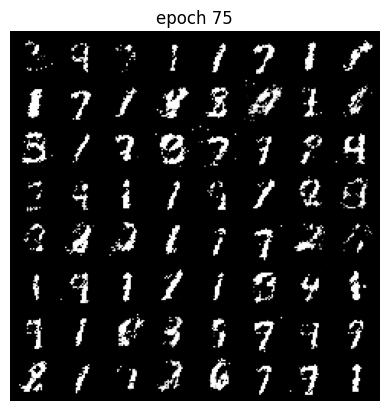

Epoch 75 of 100
Generator loss: 1.57918966, Discriminator loss: 0.91685015


118it [00:12,  9.52it/s]                         


Epoch 76 of 100
Generator loss: 1.54184830, Discriminator loss: 0.91715878


118it [00:12,  9.55it/s]                         


Epoch 77 of 100
Generator loss: 1.52080476, Discriminator loss: 0.94753832


118it [00:13,  8.91it/s]                         


Epoch 78 of 100
Generator loss: 1.52630854, Discriminator loss: 0.92790747


118it [00:12,  9.19it/s]                         


Epoch 79 of 100
Generator loss: 1.54494512, Discriminator loss: 0.92077851


118it [00:12,  9.38it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


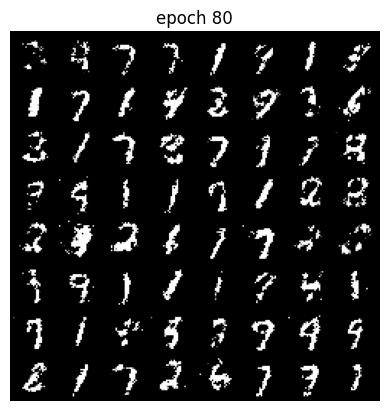

Epoch 80 of 100
Generator loss: 1.44625962, Discriminator loss: 0.96976751


118it [00:12,  9.40it/s]                         


Epoch 81 of 100
Generator loss: 1.43637383, Discriminator loss: 0.98907506


118it [00:12,  9.64it/s]                         


Epoch 82 of 100
Generator loss: 1.39024055, Discriminator loss: 1.00302732


118it [00:12,  9.58it/s]                         


Epoch 83 of 100
Generator loss: 1.41997349, Discriminator loss: 0.99095190


118it [00:12,  9.51it/s]                         


Epoch 84 of 100
Generator loss: 1.42483330, Discriminator loss: 0.99245387


118it [00:12,  9.23it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


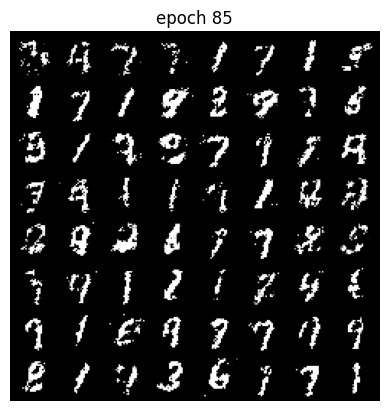

Epoch 85 of 100
Generator loss: 1.34286606, Discriminator loss: 1.02868056


118it [00:12,  9.10it/s]                         


Epoch 86 of 100
Generator loss: 1.38625479, Discriminator loss: 0.99938792


118it [00:12,  9.17it/s]                         


Epoch 87 of 100
Generator loss: 1.35505736, Discriminator loss: 1.01011491


118it [00:12,  9.36it/s]                         


Epoch 88 of 100
Generator loss: 1.30623984, Discriminator loss: 1.03904259


118it [00:12,  9.27it/s]                         


Epoch 89 of 100
Generator loss: 1.30526674, Discriminator loss: 1.03783989


118it [00:12,  9.76it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


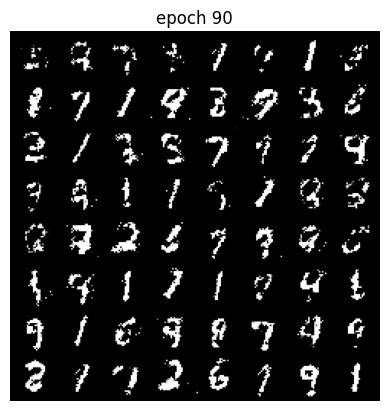

Epoch 90 of 100
Generator loss: 1.33384156, Discriminator loss: 1.02980816


118it [00:12,  9.67it/s]                         


Epoch 91 of 100
Generator loss: 1.36423206, Discriminator loss: 1.02195382


118it [00:11,  9.90it/s]                         


Epoch 92 of 100
Generator loss: 1.37681961, Discriminator loss: 1.00548160


118it [00:12,  9.50it/s]                         


Epoch 93 of 100
Generator loss: 1.33636487, Discriminator loss: 1.02644539


118it [00:12,  9.46it/s]                         


Epoch 94 of 100
Generator loss: 1.32097757, Discriminator loss: 1.03376698


118it [00:12,  9.23it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


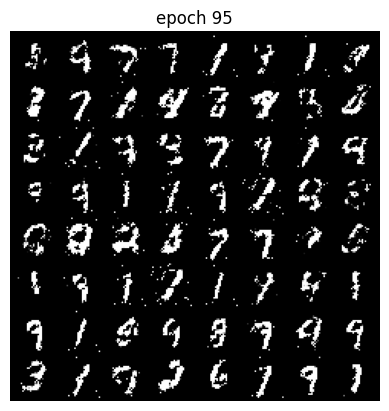

Epoch 95 of 100
Generator loss: 1.34575069, Discriminator loss: 1.02615333


118it [00:12,  9.42it/s]                         


Epoch 96 of 100
Generator loss: 1.29443741, Discriminator loss: 1.04788744


118it [00:12,  9.61it/s]                         


Epoch 97 of 100
Generator loss: 1.30378759, Discriminator loss: 1.05180311


118it [00:12,  9.44it/s]                         


Epoch 98 of 100
Generator loss: 1.30084074, Discriminator loss: 1.04599524


118it [00:12,  9.37it/s]                         


Epoch 99 of 100
Generator loss: 1.30299401, Discriminator loss: 1.05187643


118it [00:12,  9.41it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


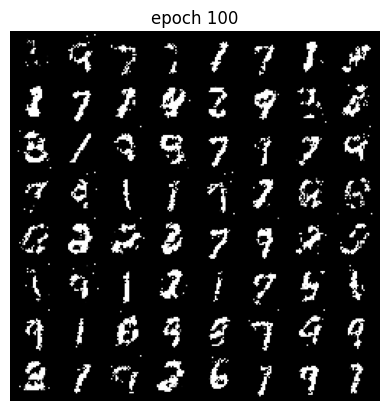

Epoch 100 of 100
Generator loss: 1.28304195, Discriminator loss: 1.05228686


In [14]:
torch.manual_seed(7777)

def discriminator_loss(output_real, output_fake):
    ############ YOUR CODE HERE ##########
    real_label = label_real(output_real.size(0))
    fake_label = label_fake(output_fake.size(0)) 

    loss_real = criterion(output_real, real_label)
    loss_fake = criterion(output_fake, fake_label)
    total_loss = loss_real + loss_fake

    return total_loss, loss_real, loss_fake
    ######################################
    
def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
  
    loss = criterion(output, true_label)

    return loss 

    ######################################

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        
        image, _ = data
        image = image.to(device)
        b_size = len(image)

        # run the discriminator for k number of steps
        for step in range(k):
            data_fake = generator(create_noise(b_size, nz)).detach()
            data_real = image + torch.randn_like(image) * 0.5
            # train the discriminator network
            optim_d.zero_grad()

            output_real = discriminator(data_real)
            output_fake = discriminator(data_fake)
            total_loss, loss_real, loss_fake = discriminator_loss(output_real, output_fake)
            loss_real.backward()
            loss_fake.backward()
            optim_d.step()

            loss_d += total_loss

        data_fake = generator(create_noise(b_size, nz))
        # train the generator network
        optim_g.zero_grad()
        true_label = label_real(b_size)
        output_fake = discriminator(data_fake)
        loss = generator_loss(output_fake, true_label)
        loss_g += loss
        loss.backward()
        optim_g.step()
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        # save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
        save_generator_image(generated_img, f"output/gen_img{epoch+1}.png")
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    # save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    save_generator_image(generated_img, f"output/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [15]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'output/generator.pth')

DONE TRAINING


In [16]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('output/generator_images.gif', imgs)

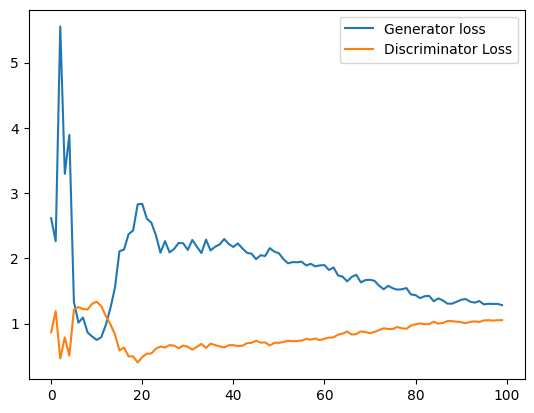

In [17]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('output/generator_images.gif', imgs)
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(torch.tensor(losses_g).cpu().detach().numpy(), label='Generator loss')
plt.plot(torch.tensor(losses_d).cpu().detach().numpy(), label='Discriminator Loss')
plt.legend()
plt.savefig('output/loss.png')